In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("HR_comma_sep.csv")
data = pd.DataFrame(data)

In [3]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Data doesn't contain any missing values

In [6]:
import seaborn as sns

In [7]:
cor = data.corr()

<AxesSubplot:>

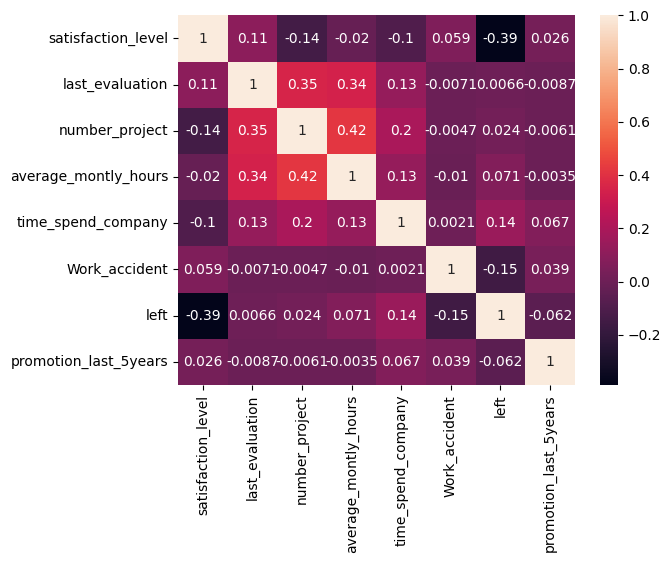

In [8]:
sns.heatmap(cor, annot=True)

(array([1335.,  498.,  477., 1778., 1471., 1775., 1768., 2115., 1998.,
        1784.]),
 array([0.09 , 0.181, 0.272, 0.363, 0.454, 0.545, 0.636, 0.727, 0.818,
        0.909, 1.   ]),
 <BarContainer object of 10 artists>)

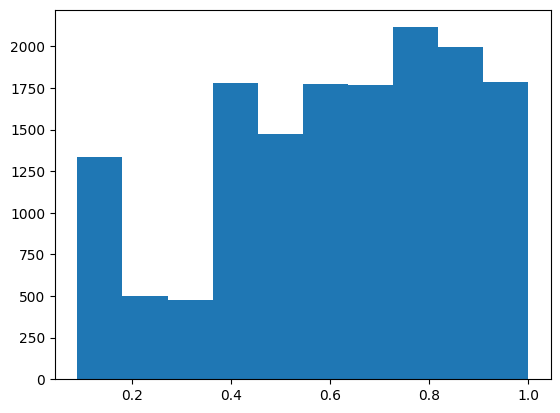

In [9]:
plt.hist(data.satisfaction_level)

Text(0.5, 1.0, 'Employee Average Monthly Hours')

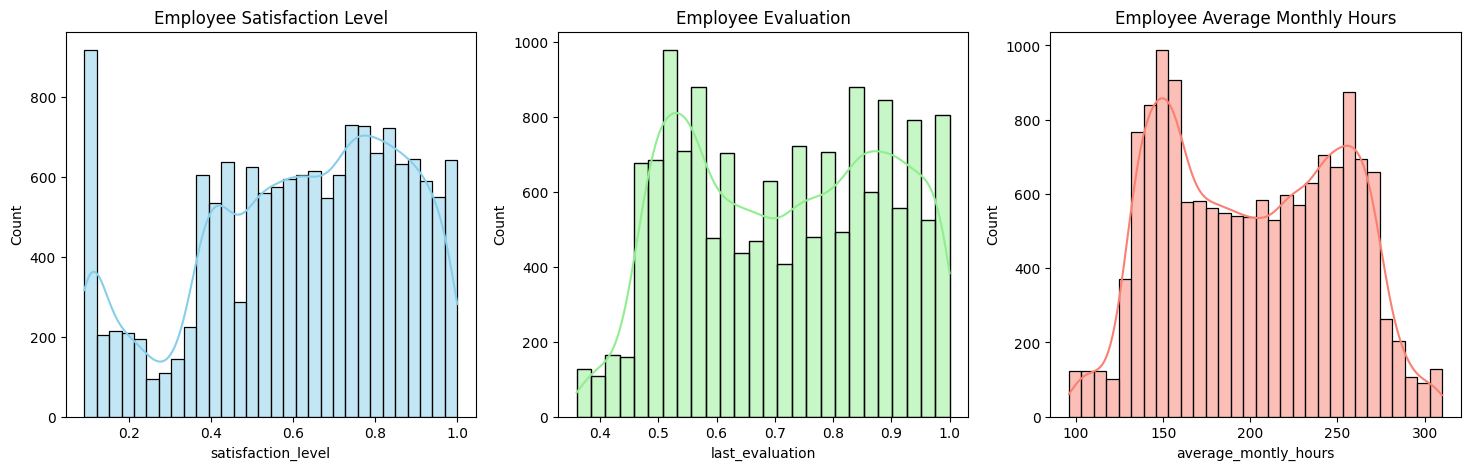

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['satisfaction_level'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Employee Satisfaction Level')

sns.histplot(data['last_evaluation'], kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Employee Evaluation')

sns.histplot(data['average_montly_hours'], kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Employee Average Monthly Hours')

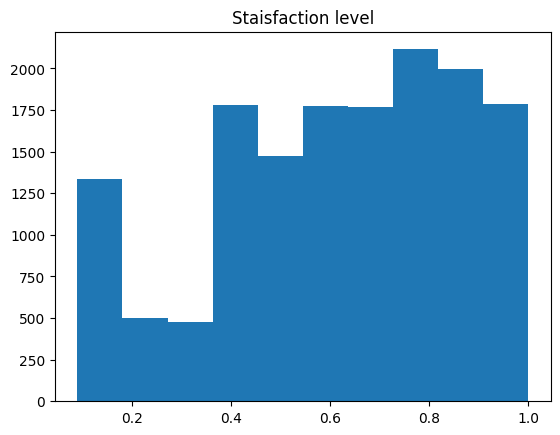

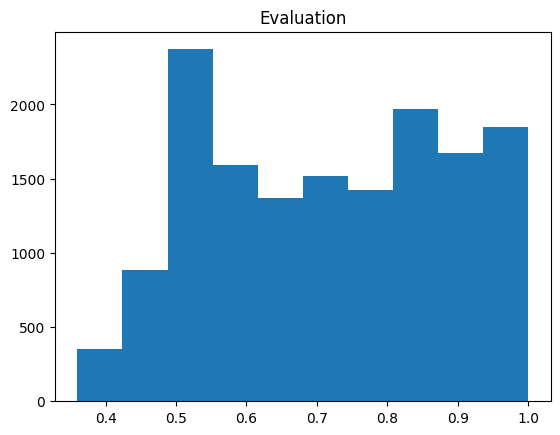

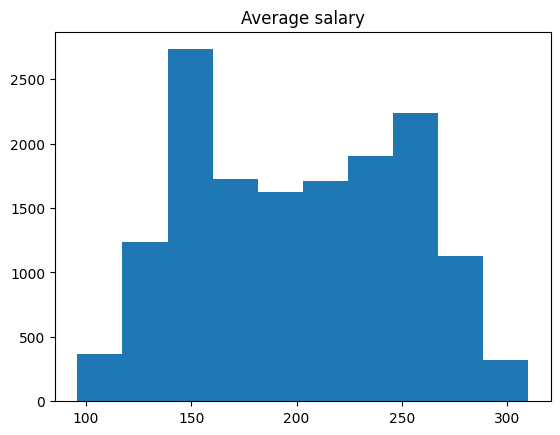

In [11]:
plt.hist(data.satisfaction_level)
plt.title("Staisfaction level")
plt.show()
plt.hist(data.last_evaluation)
plt.title("Evaluation")
plt.show()
plt.hist(data.average_montly_hours)
plt.title("Average salary")
plt.show()

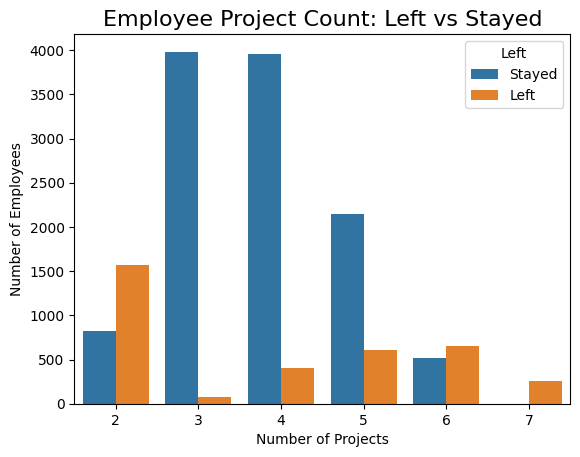

In [12]:
sns.countplot(x='number_project', hue='left',data=data)

plt.title('Employee Project Count: Left vs Stayed', fontsize=16)
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.legend(title='Left', labels=['Stayed', 'Left'])

plt.show()

In [13]:
from sklearn.cluster import KMeans

In [14]:
left_employees = data[data['left'] == 1][['satisfaction_level', 'last_evaluation']]
print(left_employees.head(10))

   satisfaction_level  last_evaluation
0                0.38             0.53
1                0.80             0.86
2                0.11             0.88
3                0.72             0.87
4                0.37             0.52
5                0.41             0.50
6                0.10             0.77
7                0.92             0.85
8                0.89             1.00
9                0.42             0.53


In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
left_employees['cluster'] = kmeans.fit_predict(left_employees)

c:\Users\Amrutha A\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


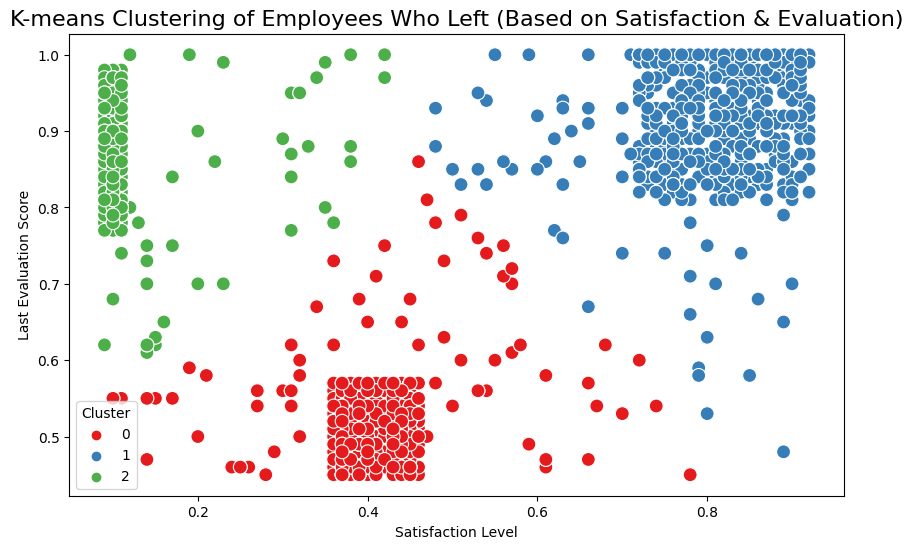

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='satisfaction_level', 
    y='last_evaluation', 
    hue='cluster', 
    palette='Set1', 
    data=left_employees, 
    s=100
)
plt.title('K-means Clustering of Employees Who Left (Based on Satisfaction & Evaluation)', fontsize=16)
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation Score')
plt.legend(title="Cluster")
plt.show()

Yes the clusters are in number 3

In [17]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [18]:
numeric_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 
                'average_montly_hours', 'time_spend_company', 
                'Work_accident', 'promotion_last_5years']

categorical_cols = ['sales', 'salary']

In [19]:
categorical_data = pd.get_dummies(data[categorical_cols], drop_first=True)

In [20]:
processed_data = pd.concat([data[numeric_cols], categorical_data, data['left']], axis=1)

In [21]:
X = processed_data.drop('left', axis=1)
y = processed_data['left']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y
)

In [23]:
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [24]:
print("Class distribution in original train data:", y_train.value_counts())
print("Class distribution after SMOTE:", y_train_smote.value_counts())

Class distribution in original train data: 0    9142
1    2857
Name: left, dtype: int64
Class distribution after SMOTE: 0    9142
1    9142
Name: left, dtype: int64


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [26]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

In [27]:
def train_and_plot(model, model_name):
    print(f"Training {model_name}...")
    
    # Apply 5-fold CV to get predictions
    y_pred = cross_val_predict(model, X, y, cv=cv)
    
    # Generate classification report
    report = classification_report(y, y_pred, output_dict=True)
    print(classification_report(y, y_pred))  # Print text report

    # Plot the classification report
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='coolwarm', ax=ax)
    ax.set_title(f'{model_name} - Classification Report')
    plt.show()

    # Plot the confusion matrix for better insights
    ConfusionMatrixDisplay.from_predictions(y, y_pred)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

Training Logistic Regression...
              precision    recall  f1-score   support

           0       0.82      0.93      0.87     11428
           1       0.60      0.35      0.44      3571

    accuracy                           0.79     14999
   macro avg       0.71      0.64      0.65     14999
weighted avg       0.77      0.79      0.77     14999



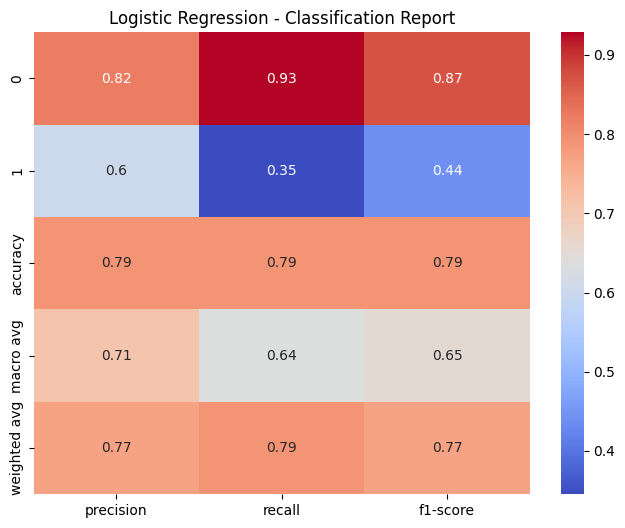

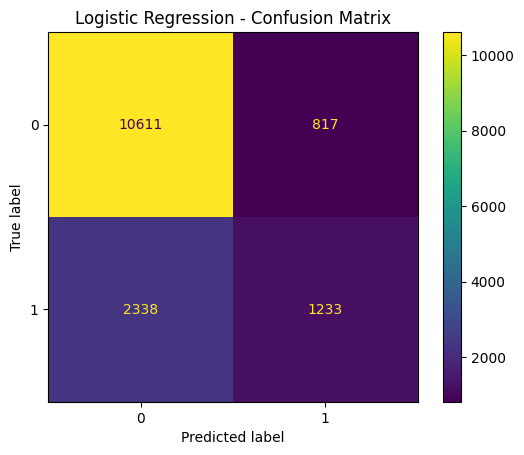

In [28]:
train_and_plot(LogisticRegression(random_state=123, max_iter=1000), "Logistic Regression")

Training Random Forest Classifier...
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11428
           1       0.99      0.97      0.98      3571

    accuracy                           0.99     14999
   macro avg       0.99      0.98      0.99     14999
weighted avg       0.99      0.99      0.99     14999



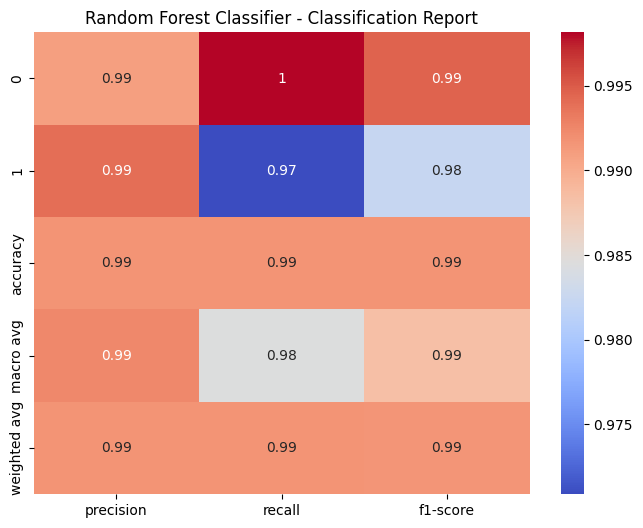

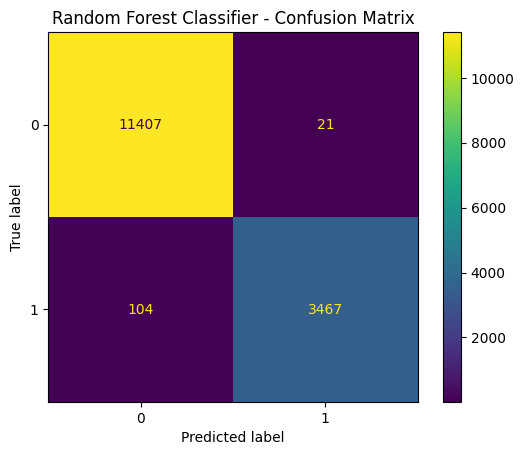

In [29]:
train_and_plot(RandomForestClassifier(random_state=123), "Random Forest Classifier")

Training Gradient Boosting Classifier...
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11428
           1       0.97      0.93      0.95      3571

    accuracy                           0.98     14999
   macro avg       0.97      0.96      0.97     14999
weighted avg       0.98      0.98      0.98     14999



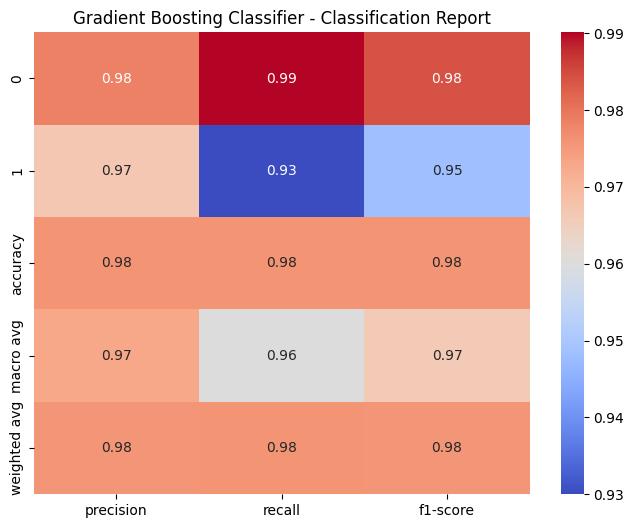

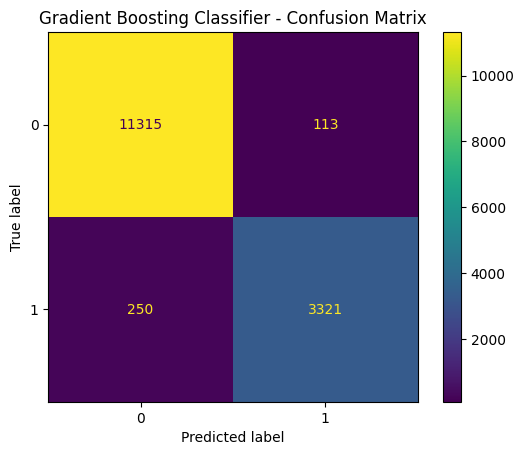

In [30]:
train_and_plot(GradientBoostingClassifier(random_state=123), "Gradient Boosting Classifier")

In [31]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

In [32]:
models = [
    ("Logistic Regression", LogisticRegression(random_state=123, max_iter=1000)),
    ("Random Forest", RandomForestClassifier(random_state=123)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=123)),
]

In [33]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

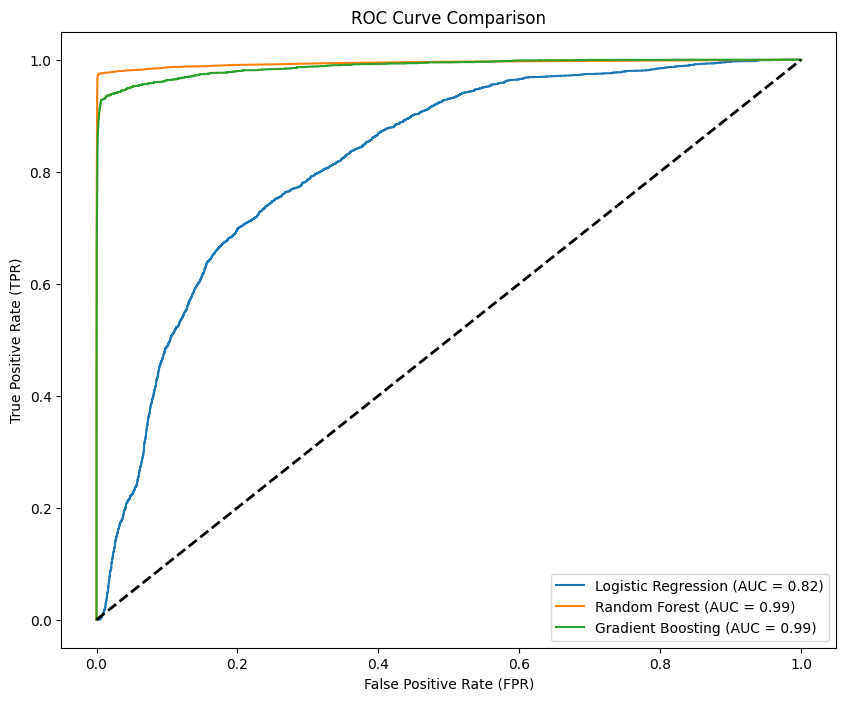

In [34]:
plt.figure(figsize=(10, 8))
for model_name, model in models:
    y_probs = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y, y_probs)
    auc_score = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


Logistic Regression Confusion Matrix and Metrics


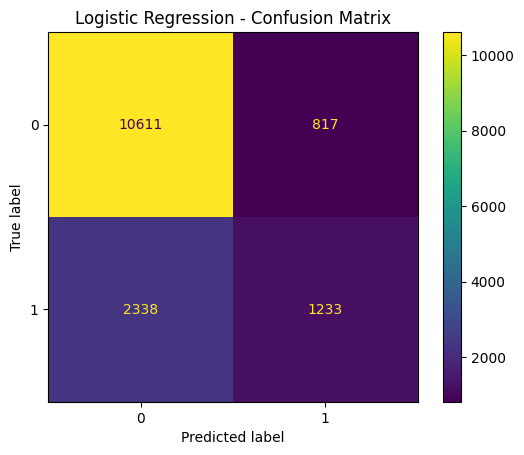

Precision: 0.60, Recall: 0.35, F1-Score: 0.44

Random Forest Confusion Matrix and Metrics


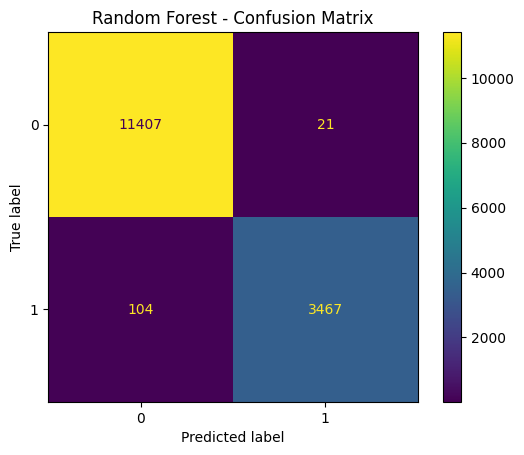

Precision: 0.99, Recall: 0.97, F1-Score: 0.98

Gradient Boosting Confusion Matrix and Metrics


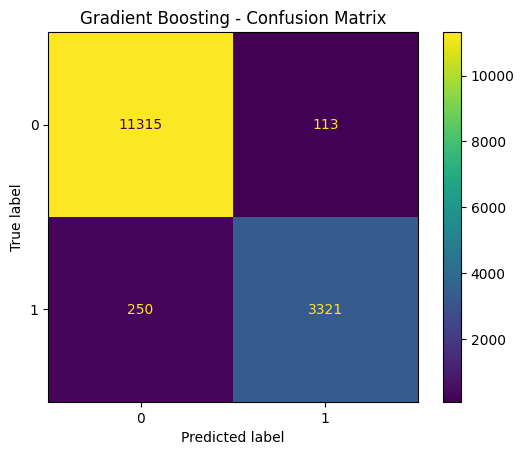

Precision: 0.97, Recall: 0.93, F1-Score: 0.95


In [35]:
for model_name, model in models:
    print(f"\n{model_name} Confusion Matrix and Metrics")
    
    y_pred = cross_val_predict(model, X, y, cv=cv)
    
    cm = confusion_matrix(y, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()
    
    precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average='binary')
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

In [36]:
best_model = GradientBoostingClassifier(random_state=123)
best_model.fit(X_train, y_train)

y_probs = best_model.predict_proba(X_test)[:, 1]

X_test['Turnover_Probability'] = y_probs 
def categorize_risk_zone(prob):
    if prob < 0.20:
        return "Safe Zone (Green)"
    elif 0.20 <= prob < 0.60:
        return "Low-Risk Zone (Yellow)"
    elif 0.60 <= prob < 0.90:
        return "Medium-Risk Zone (Orange)"
    else:
        return "High-Risk Zone (Red)"

X_test['Risk_Zone'] = X_test['Turnover_Probability'].apply(categorize_risk_zone)

print(X_test[['Turnover_Probability', 'Risk_Zone']].head())

       Turnover_Probability                  Risk_Zone
10627              0.004299          Safe Zone (Green)
2703               0.889880  Medium-Risk Zone (Orange)
6059               0.029994          Safe Zone (Green)
3258               0.012335          Safe Zone (Green)
4565               0.013097          Safe Zone (Green)


In [37]:
# Medium risk zone has high chances